## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [158]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [159]:
import requests

try: 
    response = requests.get(target_url)
    data = response.text
except:
    print('URL is not available')
else:
    print('Loading data sucessfully')


# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

Loading data sucessfully
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [160]:
split_tag = '\n'  # 找到換行符號，用該符號做字串分割後，把它拿掉

data_split = data.split(split_tag)
print(len(data_split))
data_split[0]

data_split = data_split[:-1]

data_split[0]
# 'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

data_split[3]
# 'n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'


# url data (show 4 rows only)
# n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg  --> data_split[0]
# n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg --> data_split[1]
# n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg   --> data_split[2]
# n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg --> data_split[3]



#將序號跟URL 切出來 分別裝到不同的串列
#建立兩個空的集合
number = []
URL = []

for i in range (len(data_split)):
    new_list = data_split[i].split('\t')   # '\t' => 找到tab符號 接著進行字串分割

#new_list
    number.append(new_list[0])
    URL.append(new_list[1])
    
number
URL


9996


['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg',
 'http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg',
 'http://www.dierentuin.nl/images/jongengiraffe.jpg',
 'http://farm4.static.flickr.com/3279/3118

## 將 txt 轉成 pandas dataframe

In [161]:
import pandas as pd

#創建一個字典 (dataframe格式)，將剛剛的Data放進

data ={
    'number' : number,
    'URL' : URL
}
    
df = pd.DataFrame(data)
df.head()

,number,URL
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


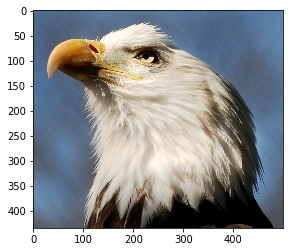

In [162]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'URL']

print(first_link)
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [163]:
df[0:5]['URL']  #取0:5列的URL值

df[0:5]['URL'].values #印出所選取範圍的值 

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
      dtype=object)

In [189]:
def img2arr_fromURLs(url_list, resize = False):  #將每張照片list 存到 建立的array函數 然後一次列印出來  
                                                 #The resize() function is used to create a new array with the specified shape
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []  # 創一個img空的陣列 用來存照片list
    
    for URL in url_list:
        
        response = requests.get(URL)
        print(response)

        img = Image.open(BytesIO(response.content))
        
        print(img) #列出二進制檔案
        
        #convert to NumPy array
        
        img_a = np.array(img)
        img_list.append(img_a)
        
        #print(img_list)
        
    return img_list


img2arr_fromURLs(df[0:5]['URL'].values)
# 可以先從def來debug 就可以知道 哪一張圖片 有問題
# 當跑到第五張圖片時， 發現 OSError: cannot identify image file <_io.BytesIO object at 0x000002E053CE3360>
# 所以可以改成 0:4 就OK

<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x2E0565ABB70>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x2E053C61668>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x2E0565A7A58>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x2E0565ABFD0>
<Response [404]>


OSError: cannot identify image file <_io.BytesIO object at 0x000002E053DC7F10>

<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x2E057885978>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x2E05662FC18>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x2E0578F3E48>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x2E0565EA390>
All image are available
Total images that we got: 4 


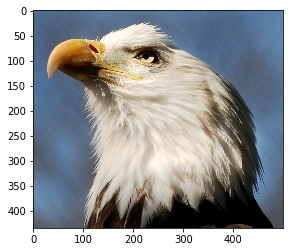

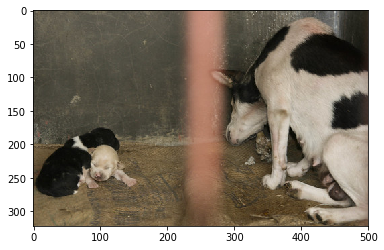

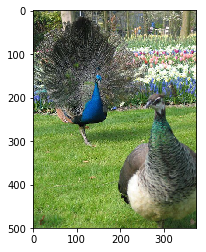

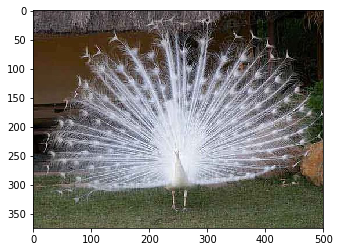

In [199]:
# 第一步 要先check 有些URL是否失效 (EX:照片無法存取)

# try:
#     result = img2arr_fromURLs(df[0:5]['URL'].values)   #其中 df[0:5]['URL'].values => 這個就是抓取Dataframe裡面URL的值
# except:
#     print('Image is unvailable')
    
    
try:
    result = img2arr_fromURLs(df[0:4]['URL'].values)
except:
    print('image is unvailable')
else:
    print('All image are available')
    
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

#print('result = ', result)
#print (im_get)
for im_get in result:    
    plt.imshow(im_get)
    plt.show()
    
    #其中 im_get的值 是從後面的result來定義的
    # Ex: for i range(10) -> i的值表示從0~9